# Initialization

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import scqubits as qubit

import numpy as np

# Flux Qubit

$H_\text{flux}=(n_{i}-n_{gi})4(E_\text{C})_{ij}(n_{j}-n_{gj})
                -E_{J}\cos\phi_{1}-E_{J}\cos\phi_{2}-\alpha E_{J}\cos(2\pi f + \phi_{1} - \phi_{2}), \; i,j\in\{1,2\}$

In [2]:
# parameters for the flux qubit
RATIO = 60.0
ALPHA = 0.8

flux_qubit = qubit.FluxQubit(
    EJ1 = 1.0, 
    EJ2 = 1.0, 
    EJ3 = ALPHA*1.0, 
    ECJ1 = 1.0/RATIO, 
    ECJ2 = 1.0/RATIO, 
    ECJ3 = 1.0/ALPHA/RATIO, 
    ECg1 = 50.0/RATIO, 
    ECg2 = 50.0/RATIO, 
    ng1 = 0.0, 
    ng2 = 0.0, 
    flux = 0.4, 
    ncut = 10,
)

In [6]:
flux_qubit = qubit.FluxQubit.create()

Output()

In [4]:
import ipywidgets
ipywidgets.Label(value='hllo', layout=ipywidgets.Layout(justify_item="flex-end", width='90px'))

Label(value='hllo', layout=Layout(width='90px'))

In [5]:
print(flux_qubit)

FLUXQUBIT
 ———— PARAMETERS ————
EJ1	: 1.0
EJ2	: 1.0
EJ3	: 0.8
ECJ1	: 0.016
ECJ2	: 0.016
ECJ3	: 0.021
ECg1	: 0.83
ECg2	: 0.83
ng1	: 0.0
ng2	: 0.0
flux	: 0.4
ncut	: 10
truncated_dim	: 10
image_filename	: c:\users\drjen\pycharmprojects\scqubits\scqubits\core\qubit_pngs/fluxqubit.png
Hilbert space dimension	: 441


### Potential energy for flux qubit

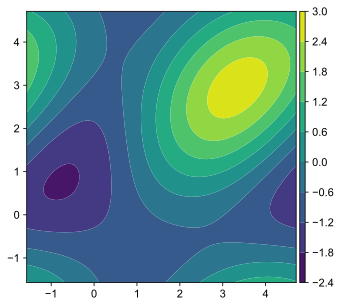

In [5]:
flux_qubit.plot_potential();

### Eigensystem

In [6]:
evals, evecs = flux_qubit.eigensys()

In [7]:
evals

array([-1.60094626, -1.33927211, -1.31303769, -1.10195874, -1.05456892,
       -1.03943899])

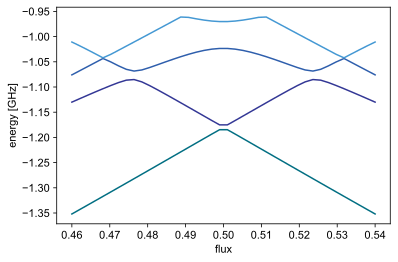

In [7]:
flux_list = np.linspace(.46, .54, 40)
flux_qubit.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False);

In [8]:
n1_matelements = flux_qubit.matrixelement_table('n_1_operator', evals_count=16)

### Eigenfunctions

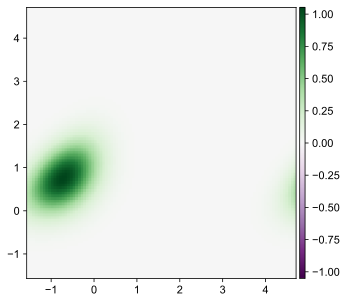

In [9]:
esys = flux_qubit.eigensys()
flux_qubit.plot_wavefunction(esys, which=0, mode='real');

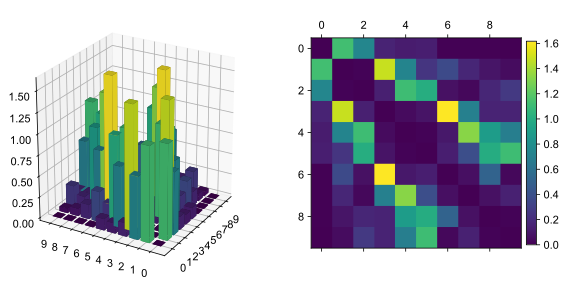

In [12]:
flux_qubit.plot_matrixelements('n_1_operator', evals_count=10);

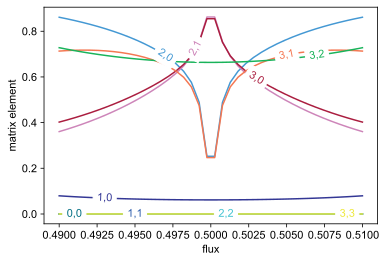

In [13]:
flux_list = np.linspace(.49, .51, 40)
flux_qubit.plot_matelem_vs_paramvals('n_1_operator', 'flux', flux_list);